# EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks

[EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)

이번에는 EfficientNet에 대해 학습하겠습니다.

EfficientNet은 모델의 너비, 깊이, 해상도를 균형 있게 조절하여 적은 파라미터로도 높은 성능을 달성한 컨볼루션 신경망(CNN) 아키텍처입니다.

이를 통해 EfficientNet의 핵심 개념을 이해하고, TensorFlow와 PyTorch를 사용하여 구현해보겠습니다.

또한, 사전 학습된 EfficientNet 모델을 활용하여 이미지 분류를 수행하고, 전이 학습의 이점을 살펴보겠습니다.

## 1. EfficientNet 소개

### 1.1 EfficientNet이란?

- EfficientNet은 모델의 깊이(Depth), 너비(Width), **해상도(Resolution)**를 균형 있게 조정하여 효율성과 성능을 동시에 달성한 컨볼루션 신경망 아키텍처입니다.
- 기존의 모델 확장 방식이 깊이 또는 너비 등 하나의 차원만을 증가시키는 것과 달리, EfficientNet은 Compound Scaling 기법을 통해 세 가지 차원을 동시에 확장합니다.
- EfficientNet은 AutoML을 사용하여 베이스라인 모델인 EfficientNet-B0를 설계하고, Compound Scaling을 적용하여 EfficientNet-B1부터 B7까지 확장합니다.

<img src="https://velog.velcdn.com/images%2Friverdeer%2Fpost%2Fdb2b4f5c-e203-4a2f-a22c-9faefa15febd%2Fimage.png">

### 1.2 배경 및 동기

딥러닝 모델의 성능을 높이기 위해 모델의 크기를 늘리는 것은 일반적인 방법입니다. 그러나 단순히 깊이, 너비, 해상도 중 하나만 늘리는 것은 효율적이지 않을 수 있습니다.

- 깊이 증가: 너무 깊은 모델은 그라디언트 소실 문제를 겪을 수 있습니다.
- 너비 증가: 너무 넓은 모델은 과적합의 위험이 있습니다.
- 해상도 증가: 높은 해상도는 연산 비용을 크게 증가시킵니다.

EfficientNet은 이러한 문제를 해결하기 위해 모델 스케일링에 대한 체계적인 접근을 제안합니다. 이를 통해 적은 파라미터로도 높은 성능을 달성합니다.

## 2. EfficientNet의 주요 개념

### 2.1 모델 스케일링(Model Scaling)
모델 스케일링은 주어진 리소스 내에서 모델의 크기를 조정하여 성능을 향상시키는 방법입니다. 기존에는 다음과 같이 단일 차원을 확장하는 방식이 주로 사용되었습니다.

- 깊이 스케일링: 계층 수를 늘려 모델의 깊이를 증가시킵니다.
- 너비 스케일링: 각 계층의 채널 수를 늘려 모델의 너비를 증가시킵니다.
- 해상도 스케일링: 입력 이미지의 해상도를 높여 더 세밀한 특징을 학습합니다.

하지만 이러한 단일 스케일링은 모델의 효율성을 저하시킬 수 있습니다.

<img src="https://velog.velcdn.com/images%2Friverdeer%2Fpost%2Fac67f7c3-fef8-416f-bc22-e74587e7417f%2Fimage.png">

### 2.2 Compound Scaling
Compound Scaling은 깊이, 너비, 해상도를 균형 있게 확장하는 방법입니다. 하나의 **스케일링 계수(ϕ)**를 사용하여 각 차원을 일정한 비율로 확장합니다.

- 수식으로 표현하면:

    - $Depth : d = α^ϕ$

    - $Width : w = β^ϕ$

    - $Resolution : r = γ^ϕ$

    - $Subject to : α⋅β^2 ⋅γ^2 ≈2$


- 여기서 𝛼, 𝛽, 𝛾는 고정된 상수이며, 작은 그리드 검색을 통해 찾습니다.
- ϕ는 스케일링 계수로, 모델의 크기를 조절합니다.

이를 통해 모델의 깊이, 너비, 해상도를 동시에 조절하여 효율적인 모델 확장이 가능합니다.

<img src="https://velog.velcdn.com/images%2Friverdeer%2Fpost%2Fe258ee71-bb04-4dc5-939f-35aa6065196f%2Fimage.png">

### 2.3 EfficientNet의 핵심 요소
EfficientNet은 다음과 같은 핵심 요소로 구성됩니다.

1. MBConv 블록

    - MobileNetV2에서 소개된 Inverted Residual 구조를 기반으로 합니다.
    - Depthwise Convolution과 Pointwise Convolution을 사용하여 연산 효율을 높입니다.

2. Squeeze-and-Excitation(SE) 블록

    - 채널 간의 중요도를 학습하여 특성 맵의 채널별 가중치를 조정합니다.
    - 글로벌 정보에 기반한 채널 어텐션 메커니즘을 제공합니다.

3. Swish 활성화 함수

- ReLU보다 성능이 우수한 비선형 활성화 함수입니다.

- 수식: $Swish(x)=x⋅sigmoid(x)$

4. Compound Scaling

- 앞서 설명한 방법으로 모델의 깊이, 너비, 해상도를 균형 있게 확장합니다.

### 2.4 EfficientNet-B0 (Baseline 모델)

- EfficientNet-B0는 AutoML을 사용하여 설계된 베이스라인 모델입니다.
- **NAS (Neural Architecture Search)**를 통해 최적의 구조를 탐색했습니다.
- 이후 Compound Scaling을 적용하여 EfficientNet-B1부터 B7까지 확장합니다.

## 3. EfficientNet의 장점

- 높은 효율성: 적은 파라미터와 연산량으로도 높은 성능을 달성합니다.
- 균형 잡힌 스케일링: 깊이, 너비, 해상도를 균형 있게 확장하여 효율적인 모델을 생성합니다.
- AutoML 기반 설계: Neural Architecture Search를 통해 베이스라인 모델을 자동으로 설계합니다.
- 전이 학습에 유용: 다양한 데이터셋에 대해 높은 성능을 보이며, 전이 학습에 효과적입니다.


<img src="https://velog.velcdn.com/images%2Friverdeer%2Fpost%2F7b5b6db1-a950-4339-aa04-fee0d7fe9399%2Fimage.png">

<img src="https://velog.velcdn.com/images%2Friverdeer%2Fpost%2F688b4f30-94ab-452d-ad3b-46058ef1f691%2Fimage.png">

## 4. EfficientNet 구현

EfficientNet의 핵심은 MBConv 블록과 Compound Scaling입니다.

먼저 MBConv 블록을 구현하고, 이를 사용하여 EfficientNet-B0을 구성하겠습니다.

## 4.1 TensorFlow를 사용한 EfficientNet 구현

### 필요한 라이브러리 import

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import backend as K

### Swish 활성화 함수 정의

TensorFlow Keras에서는 tf.nn.swish를 사용할 수 있습니다.

In [ ]:
def swish(x):
    return tf.nn.swish(x)

### Squeeze and Excitation 블록 구현

In [ ]:
def se_block(inputs, se_ratio=0.25):
    filters = inputs.shape[-1]
    se_filters = max(1, int(filters * se_ratio))
    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.Reshape((1, 1, filters))(x)
    x = layers.Conv2D(se_filters, kernel_size=1, activation='relu')(x)
    x = layers.Conv2D(filters, kernel_size=1, activation='sigmoid')(x)
    x = layers.Multiply()([inputs, x])
    return x

- Squeeze 단계: 글로벌 평균 풀링으로 채널별 통계 정보를 추출합니다.
- Excitation 단계: 두 개의 1x1 합성곱과 활성화 함수를 통해 채널 간 관계를 학습합니다.
- 재조정: 입력과 SE 블록의 출력을 곱하여 채널별 가중치를 적용합니다.


### MBConv 블록 구현

In [ ]:
def mbconv_block(inputs, filters, kernel_size, strides, expand_ratio, se_ratio, drop_rate, block_id):
    channel_axis = -1
    has_se = se_ratio is not None and se_ratio > 0
    input_filters = K.int_shape(inputs)[channel_axis]
    expanded_filters = input_filters * expand_ratio

    # Expansion phase
    if expand_ratio != 1:
        x = layers.Conv2D(expanded_filters, 1, padding='same', use_bias=False, name=f'block{block_id}_expand_conv')(inputs)
        x = layers.BatchNormalization(axis=channel_axis, name=f'block{block_id}_expand_bn')(x)
        x = layers.Activation(swish, name=f'block{block_id}_expand_activation')(x)
    else:
        x = inputs

    # Depthwise Convolution
    if strides == 1:
        x = layers.DepthwiseConv2D(kernel_size, strides=strides, padding='same', use_bias=False, name=f'block{block_id}_dwconv')(x)
    else:
        x = layers.ZeroPadding2D(padding=((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), name=f'block{block_id}_dwconv_pad')(x)
        x = layers.DepthwiseConv2D(kernel_size, strides=strides, padding='valid', use_bias=False, name=f'block{block_id}_dwconv')(x)
    x = layers.BatchNormalization(axis=channel_axis, name=f'block{block_id}_bn')(x)
    x = layers.Activation(swish, name=f'block{block_id}_activation')(x)

    # Squeeze and Excitation
    if has_se:
        se_filters = max(1, int(input_filters * se_ratio))
        se = layers.GlobalAveragePooling2D(name=f'block{block_id}_se_squeeze')(x)
        se = layers.Reshape((1, 1, expanded_filters), name=f'block{block_id}_se_reshape')(se)
        se = layers.Conv2D(se_filters, 1, padding='same', activation=swish, name=f'block{block_id}_se_reduce')(se)
        se = layers.Conv2D(expanded_filters, 1, padding='same', activation='sigmoid', name=f'block{block_id}_se_expand')(se)
        x = layers.Multiply(name=f'block{block_id}_se_excite')([x, se])

    # Output phase
    x = layers.Conv2D(filters, 1, padding='same', use_bias=False, name=f'block{block_id}_project_conv')(x)
    x = layers.BatchNormalization(axis=channel_axis, name=f'block{block_id}_project_bn')(x)

    if strides == 1 and input_filters == filters:
        if drop_rate > 0:
            x = layers.Dropout(drop_rate, noise_shape=(None, 1, 1, 1), name=f'block{block_id}_drop')(x)
        x = layers.Add(name=f'block{block_id}_add')([x, inputs])

    return x

- Expansion Phase
    - 입력 채널을 expand_ratio만큼 확장합니다.
- Depthwise Convolution
    - 채널별로 컨볼루션을 수행합니다.
- Squeeze-and-Excitation(SE)
    - 채널별 중요도를 조정합니다.
- Projection Phase
    - 채널 수를 원래대로 줄입니다.
- Skip Connection
    - 스트라이드가 1이고 입력과 출력 채널 수가 같을 때, 스킵 연결을 적용합니다.

### EfficientNet-B0 구성

In [ ]:
def EfficientNetB0(input_shape=(224, 224, 3), num_classes=1000, drop_connect_rate=0.2):
    inputs = layers.Input(shape=input_shape, name='input_layer')
    channel_axis = -1

    # Stem
    x = layers.Rescaling(1./255., name='rescaling')(inputs)
    x = layers.Normalization(mean=[0.485, 0.456, 0.406],
                             variance=[0.229**2, 0.224**2, 0.225**2], name='normalization')(x)
    x = layers.ZeroPadding2D(padding=((0, 1), (0, 1)), name='stem_conv_pad')(x)
    x = layers.Conv2D(32, 3, strides=2, padding='valid', use_bias=False, name='stem_conv')(x)
    x = layers.BatchNormalization(axis=channel_axis, name='stem_bn')(x)
    x = layers.Activation(swish, name='stem_activation')(x)

    # Blocks
    x = mbconv_block(x, filters=16, kernel_size=3, strides=1, expand_ratio=1, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=1)

    x = mbconv_block(x, filters=24, kernel_size=3, strides=2, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=2)
    x = mbconv_block(x, filters=24, kernel_size=3, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=3)

    x = mbconv_block(x, filters=40, kernel_size=5, strides=2, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=4)
    x = mbconv_block(x, filters=40, kernel_size=5, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=5)

    x = mbconv_block(x, filters=80, kernel_size=3, strides=2, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=6)
    x = mbconv_block(x, filters=80, kernel_size=3, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=7)
    x = mbconv_block(x, filters=80, kernel_size=3, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=8)

    x = mbconv_block(x, filters=112, kernel_size=5, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=9)
    x = mbconv_block(x, filters=112, kernel_size=5, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=10)

    x = mbconv_block(x, filters=192, kernel_size=5, strides=2, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=11)
    x = mbconv_block(x, filters=192, kernel_size=5, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=12)
    x = mbconv_block(x, filters=192, kernel_size=5, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=13)
    x = mbconv_block(x, filters=192, kernel_size=5, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=14)

    x = mbconv_block(x, filters=320, kernel_size=3, strides=1, expand_ratio=6, se_ratio=0.25,
                     drop_rate=drop_connect_rate, block_id=15)

    # Top
    x = layers.Conv2D(1280, 1, padding='same', use_bias=False, name='top_conv')(x)
    x = layers.BatchNormalization(axis=channel_axis, name='top_bn')(x)
    x = layers.Activation(swish, name='top_activation')(x)
    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
    if drop_connect_rate > 0:
        x = layers.Dropout(drop_connect_rate, name='top_dropout')(x)
    x = layers.Dense(num_classes, activation='softmax', name='predictions')(x)

    model = models.Model(inputs=inputs, outputs=x, name='EfficientNetB0')
    return model

# 모델 생성
model = EfficientNetB0(input_shape=(224, 224, 3), num_classes=1000)

- Stem
    - 입력 이미지에 대한 초기 처리를 수행합니다.
        - 입력을 [0, 1] 범위로 스케일링하고, 평균과 분산을 정규화합니다.
        - 합성곱과 Batch Normalization, Swish 활성화를 적용합니다.
- MBConv 블록들
    - EfficientNet-B0의 구성에 따라 블록을 쌓습니다.

- Top
    - 마지막 특징 맵을 분류기로 연결합니다.
        - Global Average Pooling과 Dense 레이어를 통해 분류를 수행합니다.

### 모델 요약

In [ ]:
model.summary()

Model: "EfficientNetB0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ normalization[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_dwconv             │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_bn                 │ (None, 112, 112, 32)   │            128 │ block1_dwconv[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_activation         │ (None, 112, 112, 32)   │              0 │ block1_bn[0][0]        │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_se_squeeze         │ (None, 32)             │              0 │ block1_activation[0][… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_se_reshape         │ (None, 1, 1, 32)       │              0 │ block1_se_squeeze[0][… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_se_reduce (Conv2D) │ (None, 1, 1, 8)        │            264 │ block1_se_reshape[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_se_expand (Conv2D) │ (None, 1, 1, 32)       │            288 │ block1_se_reduce[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_se_excite          │ (None, 112, 112, 32)   │              0 │ block1_activation[0][… │
│ (Multiply)           

 Total params: 5,119,080 (19.53 MB)

 Trainable params: 5,079,976 (19.38 MB)

 Non-trainable params: 39,104 (152.75 KB)

## 4.2 PyTorch를 사용한 EfficientNet 구현

### 필요한 라이브러리 import

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.ops import StochasticDepth
import math

### Swish 활성화 함수 정의

In [ ]:
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)


- Swish 활성화 함수는 입력값과 그 시그모이드 값을 곱한 형태입니다.
- Swish는 ReLU보다 성능이 우수한 것으로 알려져 있습니다.

### Squeeze-and-Excitation(SE) 블록 구현


In [ ]:
class SqueezeExcitation(nn.Module):
    def __init__(self, input_channels, squeeze_factor=4):
        super(SqueezeExcitation, self).__init__()
        squeeze_channels = input_channels // squeeze_factor
        self.fc1 = nn.Conv2d(input_channels, squeeze_channels, kernel_size=1)
        self.act1 = Swish()
        self.fc2 = nn.Conv2d(squeeze_channels, input_channels, kernel_size=1)
        self.act2 = nn.Sigmoid()

    def forward(self, x):
        scale = F.adaptive_avg_pool2d(x, output_size=1)
        scale = self.fc1(scale)
        scale = self.act1(scale)
        scale = self.fc2(scale)
        scale = self.act2(scale)
        return x * scale

- Squeeze 단계: 글로벌 평균 풀링으로 채널별 통계 정보를 추출합니다.
- Excitation 단계: 두 개의 1x1 컨볼루션과 활성화 함수를 통해 채널 간의 관계를 학습합니다.
- 재조정: 입력과 SE 블록의 출력을 곱하여 채널별 가중치를 적용합니다.

### MBConv 블록 구현

In [ ]:
class MBConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, expand_ratio, stride, kernel_size, se_ratio=0.25, drop_connect_rate=0.2):
        super(MBConvBlock, self).__init__()
        self.stride = stride
        self.drop_connect_rate = drop_connect_rate
        self.use_residual = (self.stride == 1 and in_channels == out_channels)

        expanded_channels = in_channels * expand_ratio

        layers = []

        # Expansion phase
        if expand_ratio != 1:
            layers.append(nn.Conv2d(in_channels, expanded_channels, kernel_size=1, bias=False))
            layers.append(nn.BatchNorm2d(expanded_channels))
            layers.append(Swish())

        # Depthwise convolution
        layers.append(nn.Conv2d(expanded_channels, expanded_channels, kernel_size=kernel_size, stride=stride,
                                padding=kernel_size // 2, groups=expanded_channels, bias=False))
        layers.append(nn.BatchNorm2d(expanded_channels))
        layers.append(Swish())

        # Squeeze-and-Excitation
        if se_ratio:
            layers.append(SqueezeExcitation(expanded_channels, squeeze_factor=int(1/se_ratio)))

        # Pointwise convolution
        layers.append(nn.Conv2d(expanded_channels, out_channels, kernel_size=1, bias=False))
        layers.append(nn.BatchNorm2d(out_channels))

        self.block = nn.Sequential(*layers)

    def drop_connect(self, x):
        if not self.training:
            return x
        keep_prob = 1 - self.drop_connect_rate
        random_tensor = keep_prob + torch.rand([x.size(0), 1, 1, 1], dtype=x.dtype, device=x.device)
        random_tensor.floor_()
        return x / keep_prob * random_tensor

    def forward(self, x):
        out = self.block(x)
        if self.use_residual:
            out = self.drop_connect(out)
            out = out + x
        return out

- Expansion phase: 입력 채널을 expand_ratio만큼 확장합니다.
- Depthwise convolution: 채널별로 컨볼루션을 수행합니다.
- Squeeze-and-Excitation(SE): 채널별 중요도를 조정합니다.
- Pointwise convolution: 채널 수를 원래대로 조정합니다.
- Residual connection: 입력과 출력을 더해줍니다.

### EfficientNet 클래스 구현

In [ ]:
class EfficientNet(nn.Module):
    def __init__(self, num_classes=1000, width_coefficient=1.0, depth_coefficient=1.0, dropout_rate=0.2, drop_connect_rate=0.2):
        super(EfficientNet, self).__init__()

        def round_filters(filters, multiplier):
            filters *= multiplier
            new_filters = max(8, int(filters + 8 / 2) // 8 * 8)
            if new_filters < 0.9 * filters:
                new_filters += 8
            return int(new_filters)

        def round_repeats(repeats):
            return int(math.ceil(depth_coefficient * repeats))

        # 기본 설정
        base_channels = 32
        stem_channels = round_filters(base_channels, width_coefficient)

        # Stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, stem_channels, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(stem_channels),
            Swish()
        )

        # MBConv Blocks 설정
        self.blocks = nn.ModuleList()

        # 각 단계의 설정 [확장비율, 채널 수, 반복 수, 커널 크기, 스트라이드]
        settings = [
            # [expand_ratio, out_channels, num_layers, kernel_size, stride]
            [1, 16, 1, 3, 1],
            [6, 24, 2, 3, 2],
            [6, 40, 2, 5, 2],
            [6, 80, 3, 3, 2],
            [6, 112, 3, 5, 1],
            [6, 192, 4, 5, 2],
            [6, 320, 1, 3, 1],
        ]

        in_channels = stem_channels
        total_blocks = sum(round_repeats(s[2]) for s in settings)
        block_num = 0

        for idx, (expand_ratio, out_channels, num_layers, kernel_size, stride) in enumerate(settings):
            out_channels = round_filters(out_channels, width_coefficient)
            num_layers = round_repeats(num_layers)

            for layer in range(num_layers):
                strides = stride if layer == 0 else 1
                block = MBConvBlock(
                    in_channels=in_channels,
                    out_channels=out_channels,
                    expand_ratio=expand_ratio,
                    kernel_size=kernel_size,
                    stride=strides,
                    se_ratio=0.25,
                    drop_connect_rate=drop_connect_rate * block_num / total_blocks
                )
                self.blocks.append(block)
                in_channels = out_channels
                block_num += 1

        # Head
        head_channels = round_filters(1280, width_coefficient)
        self.head = nn.Sequential(
            nn.Conv2d(in_channels, head_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(head_channels),
            Swish()
        )

        # Classifier
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(head_channels, num_classes)

    def forward(self, x):
        x = self.stem(x)
        for block in self.blocks:
            x = block(x)
        x = self.head(x)
        x = self.avgpool(x)
        x = x.flatten(start_dim=1)
        x = self.dropout(x)
        x = self.classifier(x)
        return x

- Compound Scaling을 적용하여 너비와 깊이를 조정합니다.
- Stem, MBConv Blocks, Head, Classifier로 구성됩니다.
- 각 단계에서 채널 수와 반복 횟수를 조정하여 모델을 확장합니다.

### 모델 요약

In [ ]:
from torchsummary import summary

model = EfficientNet()
print(model)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

summary(model, (3, 224, 224))


EfficientNet(
  (stem): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Swish()
  )
  (blocks): ModuleList(
    (0): MBConvBlock(
      (block): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Swish()
        (3): SqueezeExcitation(
          (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): Swish()
          (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
          (act2): Sigmoid()
        )
        (4): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): MBConvBlock(
      (block): Sequential(
        (0): Conv2d(

## 5. 사전 학습된 EfficientNet 모델 사용

EfficientNet은 복잡한 모델이며, 처음부터 학습시키는 데 많은 시간과 자원이 필요합니다.

따라서 TensorFlow / PyTorch에서는 사전 학습된 EfficientNet 모델을 제공하며, 이를 사용하여 손쉽게 이미지 분류를 수행할 수 있습니다.

## 5.1 TensorFlow를 사용한 전이 학습

### 필요한 라이브러리 import

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

### 모델 로드

In [ ]:
# 사전 학습된 EfficientNetB0 모델 로드
model = EfficientNetB0(weights='imagenet')
model.summary()

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

- EfficientNetB0 함수를 사용하여 사전 학습된 EfficientNetB0 모델을 로드합니다.
- weights='imagenet'으로 설정하여 ImageNet 데이터셋으로 학습된 가중치를 사용합니다.

In [ ]:
# 이미지 다운로드 (비행기)
!wget -O plane.jpg https://upload.wikimedia.org/wikipedia/commons/1/12/Plane-in-flight.jpg

--2024-10-27 16:27:25--  https://upload.wikimedia.org/wikipedia/commons/1/12/Plane-in-flight.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487351 (476K) [image/jpeg]
Saving to: ‘plane.jpg’

plane.jpg           100%[===================>] 475.93K   824KB/s    in 0.6s    

2024-10-27 16:27:26 (824 KB/s) - ‘plane.jpg’ saved [487351/487351]



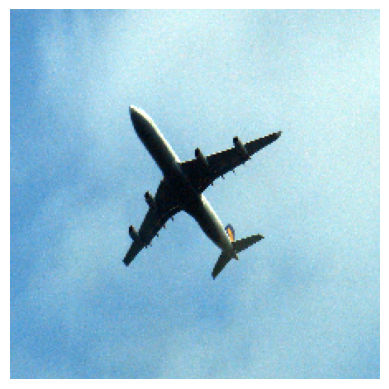

In [ ]:
# 이미지 로드 및 전처리
img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.axis('off')
plt.show()

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [ ]:
# 예측 수행
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted: [('n02690373', 'airliner', 0.29077452), ('n04552348', 'warplane', 0.07963344), ('n04592741', 'wing', 0.07472409)]


### 예측 결과
- 가장 높은 확률로 airliner(비행기)으로 분류되었습니다.

# 5.2 PyTorch를 사용한 EfficientNet 전이 학습

이번에는 PyTorch를 사용하여 사전 학습된 EfficientNet 모델을 CIFAR-10 데이터셋에 맞게 전이 학습(Transfer Learning)해보겠습니다.

## 1. 필요한 라이브러리 import

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

## 2. 데이터셋 로드 및 전처리

### 2.1 CIFAR-10 데이터셋 로드
CIFAR-10은 10개의 클래스(비행기, 자동차, 새, 고양이 등)로 구성된 작은 이미지 데이터셋입니다.

In [ ]:
# 데이터 전처리를 위한 변환(transform) 정의
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(224),  # 이미지 크기 조정
        transforms.RandomResizedCrop(224),  # 랜덤 크롭 및 리사이즈
        transforms.RandomHorizontalFlip(),  # 좌우 반전
        transforms.ToTensor(),  # 텐서로 변환
        transforms.Normalize(  # 정규화
            mean=[0.485, 0.456, 0.406],  # ImageNet 데이터셋의 평균값
            std=[0.229, 0.224, 0.225]    # ImageNet 데이터셋의 표준편차
        )
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],  # ImageNet 데이터셋의 평균값
            std=[0.229, 0.224, 0.225]    # ImageNet 데이터셋의 표준편차
        )
    ]),
}

- transforms.Resize: 이미지 크기를 조정합니다.
- transforms.RandomResizedCrop: 랜덤한 위치에서 크롭하고 리사이즈합니다.
- transforms.RandomHorizontalFlip: 이미지를 좌우로 뒤집습니다.
- transforms.ToTensor: 이미지를 텐서로 변환합니다.
- transforms.Normalize: 이미지의 픽셀 값을 정규화합니다.

### 2.2 데이터셋 로드

In [ ]:
# CIFAR-10 데이터셋 다운로드 및 로드
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=data_transforms['train'])
val_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=data_transforms['val'])

# 데이터 로더 생성
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)

100%|██████████| 170M/170M [00:12<00:00, 13.3MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


- datasets.CIFAR10: CIFAR-10 데이터셋을 로드합니다.
- DataLoader: 데이터셋을 미니배치로 분할하고 순서대로 불러올 수 있도록 합니다.

### 2.3 데이터 시각화

데이터가 제대로 로드되었는지 확인하기 위해 일부 이미지를 시각화해보겠습니다.

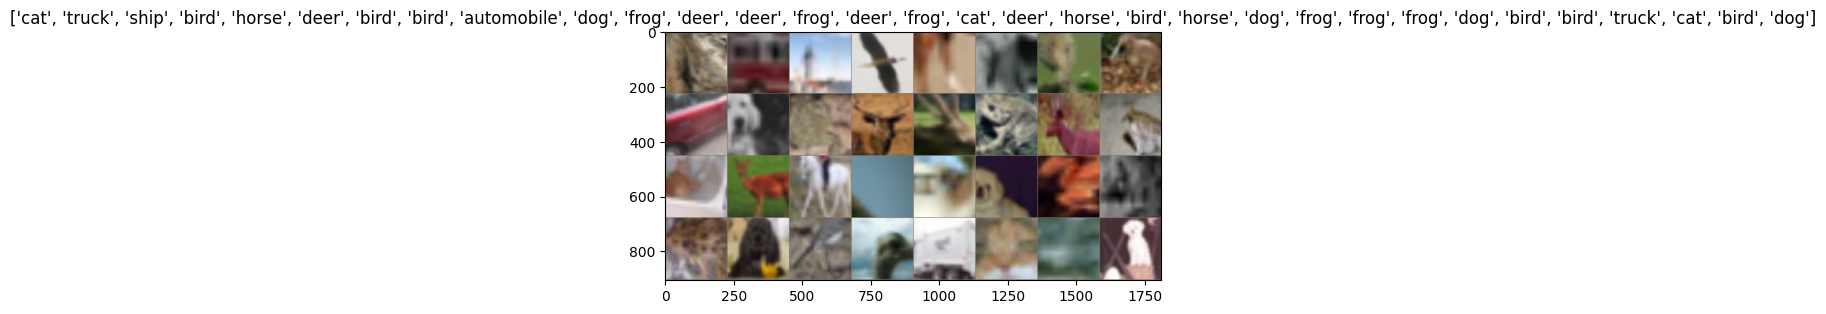

In [ ]:
# 클래스 이름 정의
class_names = train_dataset.classes

# 일부 이미지와 레이블을 시각화하는 함수 정의
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))  # 채널 순서 변경
    mean = np.array([0.485, 0.456, 0.406])  # 정규화된 평균
    std = np.array([0.229, 0.224, 0.225])   # 정규화된 표준편차
    inp = std * inp + mean  # 정규화 복원
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # 갱신을 위한 잠깐의 대기

# 데이터 로더에서 일부 배치를 가져옵니다.
inputs, classes = next(iter(train_loader))

# 배치에서 이미지를 그리드로 만듭니다.
out = torchvision.utils.make_grid(inputs)

# 이미지와 레이블 시각화
imshow(out, title=[class_names[x] for x in classes])

- torchvision.utils.make_grid: 여러 이미지를 그리드 형태로 만듭니다.
- imshow 함수: 이미지를 시각화합니다.

## 3. 사전 학습된 EfficientNet 모델 로드 및 수정

### 3.1 사전 학습된 EfficientNet-B0 모델 로드

In [ ]:
# 사전 학습된 EfficientNet-B0 모델을 로드합니다.
model = models.efficientnet_b0(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 210MB/s]


- models.efficientnet_b0: EfficientNet-B0 모델을 생성합니다.
- pretrained=True: ImageNet 데이터셋으로 학습된 가중치를 로드합니다

### 3.2 분류기(classifier) 수정

CIFAR-10 데이터셋은 10개의 클래스를 가지므로, 모델의 마지막 분류기를 수정해야 합니다.

In [ ]:
num_classes = 10  # CIFAR-10은 10개의 클래스를 가집니다.

# 모델의 분류기 부분을 교체합니다.
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)


- model.classifier[1]: EfficientNet 모델의 분류기 레이어입니다.
- nn.Linear: 새로운 선형 계층을 생성하여 출력 차원을 10으로 설정합니다.

### 3.3 모델 구조 확인

In [ ]:
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

모델의 구조를 출력하여 수정된 부분을 확인합니다.

## 4. 훈련을 위한 설정

### 4.1 디바이스 설정

In [ ]:
# GPU 사용 가능 여부에 따라 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'사용 중인 디바이스: {device}')

# 모델을 디바이스로 이동
model = model.to(device)


사용 중인 디바이스: cuda


- torch.device: 사용 가능한 디바이스를 설정합니다.
- 모델과 데이터를 동일한 디바이스로 이동해야 합니다.


### 4.2 손실 함수 및 옵티마이저 설정

In [ ]:
# 손실 함수 정의
criterion = nn.CrossEntropyLoss()

# 옵티마이저 정의 (모델의 모든 파라미터를 학습하도록 설정)
optimizer = optim.Adam(model.parameters(), lr=0.001)


- CrossEntropyLoss는 다중 분류 문제에서 주로 사용하는 손실 함수입니다.
- Adam 옵티마이저를 사용하여 모델의 파라미터를 학습합니다.
    - 학습률(lr)은 0.001로 설정했습니다.

## 5. 모델 학습 함수 정의

학습 및 검증 단계를 포함한 모델 학습 함수를 정의합니다.

In [ ]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=5):
    # 학습 결과를 저장할 리스트 초기화
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        print('-' * 20)

        # 각 에포크마다 훈련 및 검증 단계 진행
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # 모델을 훈련 모드로 설정
                dataloader = train_loader
            else:
                model.eval()   # 모델을 평가 모드로 설정
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # 데이터 로더에서 미니배치 단위로 데이터 불러오기
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # 매개변수 경사도 초기화
                optimizer.zero_grad()

                # 순전파
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    # 예측 결과
                    _, preds = torch.max(outputs, 1)

                    # 훈련 단계에서만 역전파 및 최적화 수행
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # 통계 계산
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # 에포크 손실 및 정확도 계산
            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # 손실 및 정확도 저장
            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc.item())
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc.item())

    return model, train_losses, train_accuracies, val_losses, val_accuracies


- model.train(): 모델을 훈련 모드로 설정합니다.
- model.eval(): 모델을 평가 모드로 설정합니다.
- optimizer.zero_grad(): 이전 단계에서 계산된 기울기를 초기화합니다.
- with torch.set_grad_enabled(phase == 'train'): 훈련 단계에서만 기울기 계산을 수행합니다.
- loss.backward(): 역전파를 통해 기울기를 계산합니다.
- optimizer.step(): 옵티마이저를 사용하여 파라미터를 업데이트합니다.

## 6. 모델 학습 실행

정의한 함수를 사용하여 모델을 학습시킵니다.

In [ ]:
# 에포크 수 설정
num_epochs = 5

# 모델 학습 실행
model, train_losses, train_accuracies, val_losses, val_accuracies = train_model(
    model, criterion, optimizer, train_loader, val_loader, num_epochs=num_epochs)



Epoch 1/5
--------------------
Train Loss: 0.8934 Acc: 0.6933
Val Loss: 0.3668 Acc: 0.8767

Epoch 2/5
--------------------
Train Loss: 0.6838 Acc: 0.7668
Val Loss: 0.3050 Acc: 0.8989

Epoch 3/5
--------------------
Train Loss: 0.6237 Acc: 0.7843
Val Loss: 0.2713 Acc: 0.9058

Epoch 4/5
--------------------
Train Loss: 0.5771 Acc: 0.8028
Val Loss: 0.2556 Acc: 0.9146

Epoch 5/5
--------------------
Train Loss: 0.5514 Acc: 0.8127
Val Loss: 0.2296 Acc: 0.9222


## 7. 학습 결과 시각화

### 7.1 손실 곡선 시각화

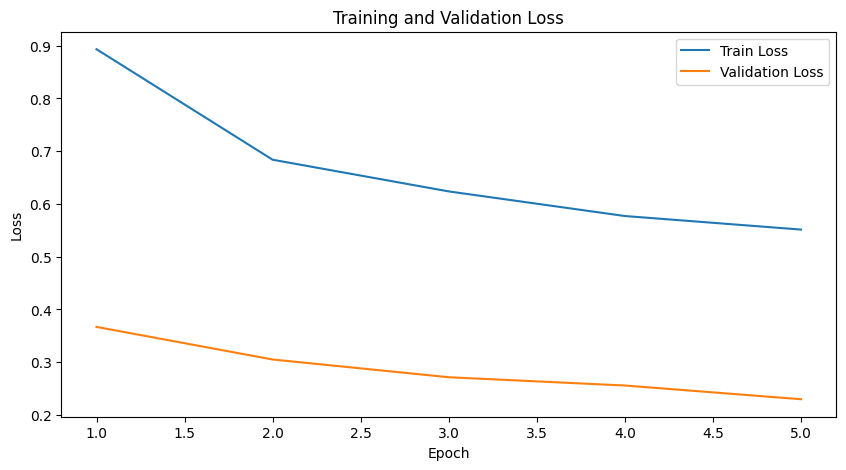

In [ ]:
# 손실 곡선 시각화
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### 7.2 정확도 곡선 시각화

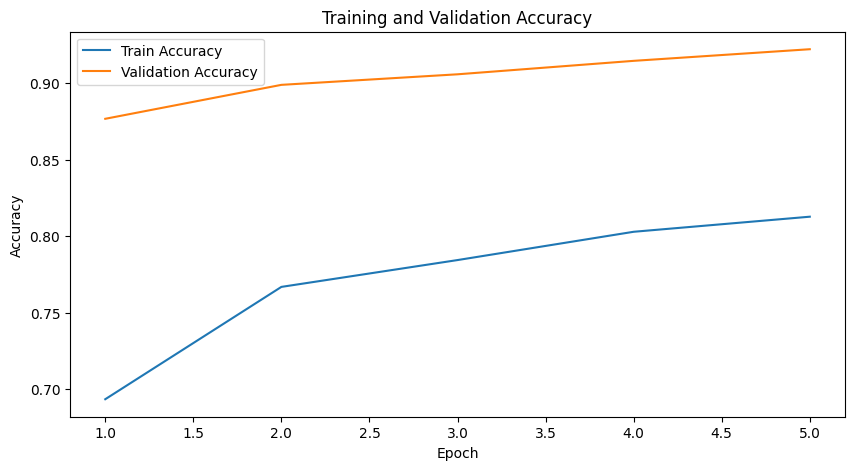

In [ ]:
# 정확도 곡선 시각화
plt.figure(figsize=(10,5))
plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


- plt.plot 함수를 사용하여 에포크에 따른 손실과 정확도의 변화를 그래프로 표현합니다.
- 훈련 데이터와 검증 데이터의 손실 및 정확도를 비교하여 과적합(overfitting) 여부를 판단할 수 있습니다.


## 8. 모델 평가 및 예측 결과 시각화


### 8.1 모델 평가

In [ ]:
# 모델을 평가 모드로 설정
model.eval()

# 전체 정확도 및 클래스별 정확도 계산
correct = 0
total = 0
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        c = (preds == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f'\n전체 테스트 데이터 정확도: {100 * correct / total:.2f}%')

# 클래스별 정확도 출력
for i in range(num_classes):
    print(f'클래스 {class_names[i]} 정확도: {100 * class_correct[i] / class_total[i]:.2f}%')



전체 테스트 데이터 정확도: 92.22%
클래스 airplane 정확도: 96.40%
클래스 automobile 정확도: 96.60%
클래스 bird 정확도: 88.60%
클래스 cat 정확도: 87.40%
클래스 deer 정확도: 93.10%
클래스 dog 정확도: 78.90%
클래스 frog 정확도: 95.80%
클래스 horse 정확도: 96.20%
클래스 ship 정확도: 94.80%
클래스 truck 정확도: 94.40%


- with torch.no_grad(): 평가 단계에서 기울기 계산을 비활성화하여 메모리 사용을 줄입니다.
- 각 클래스별 정확도를 계산하여 모델의 성능을 상세히 평가합니다.


### 8.2 예측 결과 시각화


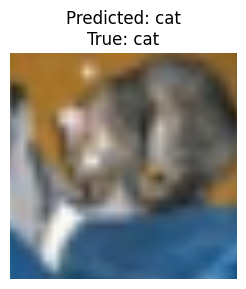

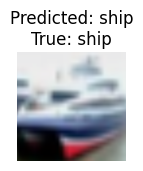

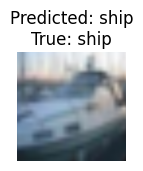

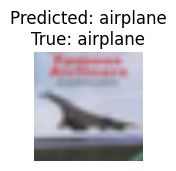

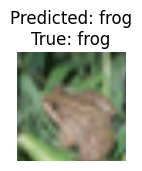

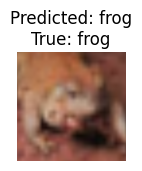

In [ ]:
# 일부 예측 결과를 시각화하는 함수 정의
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0

    plt.figure(figsize=(15, 10))

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for i in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Predicted: {class_names[preds[i]]}\nTrue: {class_names[labels[i]]}')
                imshow(inputs.cpu().data[i])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

# 예측 결과 시각화 함수 실행
visualize_model(model)


- 모델의 예측 결과와 실제 라벨을 비교하여 시각화합니다.
- model.train(mode=was_training): 모델의 훈련/평가 모드를 원래대로 복원합니다.


## 9. 마치며

이번에는 PyTorch를 사용하여 사전 학습된 EfficientNet-B0 모델을 CIFAR-10 데이터셋에 맞게 전이 학습하고, 모델의 성능을 평가하고 시각화해보았습니다.

- 전이 학습을 통해 사전 학습된 모델의 지식을 새로운 데이터셋에 적용하여 학습 시간을 단축하고 성능을 향상시킬 수 있습니다.
- 데이터 전처리와 모델 수정 과정을 통해 모델을 새로운 문제에 맞게 적응시켰습니다.
- 학습 결과 시각화를 통해 모델의 학습 상태를 파악하고, 예측 결과 시각화를 통해 모델의 성능을 직관적으로 확인했습니다.

더 나아가, 하이퍼파라미터 튜닝이나 데이터 증강 등의 기법을 적용하여 모델의 성능을 더욱 향상시킬 수 있습니다. 다양한 실험을 통해 자신만의 모델을 개선해보세요!

### Tip

- 가중치 동결(Fine-tuning): 사전 학습된 모델의 일부 층을 동결하여 학습 시간을 단축하고 과적합을 방지할 수 있습니다.

    ```
    for param in model.features.parameters():
        param.requires_grad = False
    ```

- 학습률 조정: torch.optim.lr_scheduler를 사용하여 학습률을 동적으로 조정하면 더 나은 성능을 얻을 수 있습니다.

    ```
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    ```

- 데이터 증강(Data Augmentation): 다양한 데이터 증강 기법을 적용하여 모델의 일반화 능력을 향상시킬 수 있습니다.

- 다른 EfficientNet 버전 사용: models.efficientnet_b1, models.efficientnet_b2 등 다양한 버전의 EfficientNet을 사용하여 성능을 비교해볼 수 있습니다.

- 추가 평가 지표: sklearn.metrics를 사용하여 혼동 행렬(confusion matrix)이나 정밀도(precision), 재현율(recall) 등의 지표를 계산할 수 있습니다.